In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
import scipy
import datetime
from scipy.optimize import minimize
%matplotlib inline
import scipy.optimize as sco
import scipy.interpolate as sci
import math

In [15]:
pip install riskfolio-lib

Note: you may need to restart the kernel to use updated packages.


In [16]:
stock = ['Date','URI US Equity','SBAC US Equity','EHC US Equity','BLK US Equity','MGM US Equity']

In [17]:
data = pd.read_csv("data/adjprice.csv")
data = data[stock]
data = data[(data['Date']>20000000)&( data['Date']< 20101231 )].reset_index()
data.head()

,index,Date,URI US Equity,SBAC US Equity,EHC US Equity,BLK US Equity,MGM US Equity
0,2307,20000101,17.1250,18.75,24.0621,12.349,12.2273
1,2308,20000102,17.1250,18.75,24.0621,12.349,12.2273
2,2309,20000103,16.6875,18.00,23.5025,11.945,11.4831
3,2310,20000104,16.5000,17.75,24.0621,11.406,11.3767
4,2311,20000105,16.4375,17.00,24.0621,11.317,11.1945


In [18]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data.head()

,index,Date,URI US Equity,SBAC US Equity,EHC US Equity,BLK US Equity,MGM US Equity
0,2307,2000-01-01,17.1250,18.75,24.0621,12.349,12.2273
1,2308,2000-01-02,17.1250,18.75,24.0621,12.349,12.2273
2,2309,2000-01-03,16.6875,18.00,23.5025,11.945,11.4831
3,2310,2000-01-04,16.5000,17.75,24.0621,11.406,11.3767
4,2311,2000-01-05,16.4375,17.00,24.0621,11.317,11.1945


In [19]:
psy= data.set_index('Date') #transforming the data from datetime format
data1 = psy.drop(['index'], axis=1)
assets= data1.columns

In [20]:
ye = data1[assets].pct_change().dropna()
ye.head()

,URI US Equity,SBAC US Equity,EHC US Equity,BLK US Equity,MGM US Equity
Date,,,,,
2000-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2000-01-03,-0.025547,-0.040000,-0.023256,-0.032715,-0.060864
2000-01-04,-0.011236,-0.013889,0.023810,-0.045123,-0.009266
2000-01-05,-0.003788,-0.042254,0.000000,-0.007803,-0.016015
2000-01-06,0.057034,-0.003647,-0.011628,0.015817,0.036634


In [21]:
import riskfolio as rp

In [23]:

# Building the portfolio object

port = rp.Portfolio(returns=ye)

# calculating optimal portfolio
# Select method and estimate input parameters:

methmu = 'hist' #Method to estimate expected returns based on historical data
methcov= 'hist' #Method to estimate covariance matrix based on historical data

port.assets_stats(methmu=methmu,methcov=methcov, d=0.94)

#  Estimate the optimal portfolio
model = 'Classic' #Could be Classic(historical), BL OR FM
rm = 'MV'#Variance
obj = 'Sharpe' #Objective function could be MinRisk, MaxRet, Utility or Sharpe Ratio
hist = True
rf =  0 #rf=risk free rate
l= 0 # only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
yu = w.T
yu

,URI US Equity,SBAC US Equity,EHC US Equity,BLK US Equity,MGM US Equity
weights,3.269278e-08,0.138498,0.22234,0.626875,0.012287


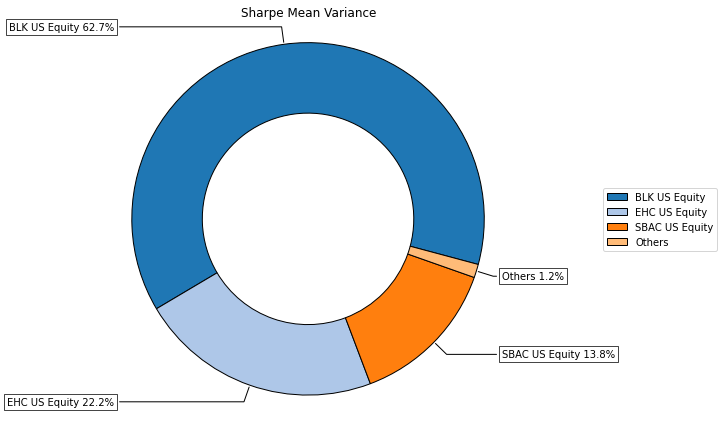

In [24]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title = 'Sharpe Mean Variance', others = 0.05, nrow=25, cmap = 'tab20',
                height=6, width = 10, ax = None)

In [25]:
points = 50
frontier = port.efficient_frontier(model=model,rm=rm,points = points, rf=rf, hist=hist)
yi= frontier.T
yi.head()

,URI US Equity,SBAC US Equity,EHC US Equity,BLK US Equity,MGM US Equity
0,1.621225e-01,0.066900,0.107897,0.555809,1.072723e-01
1,6.221546e-02,0.106860,0.170663,0.600607,5.965507e-02
2,1.991011e-02,0.123777,0.197236,0.619595,3.948188e-02
3,6.785348e-09,0.137908,0.221244,0.627024,1.382329e-02
4,1.007628e-08,0.152166,0.254222,0.593611,1.829614e-08


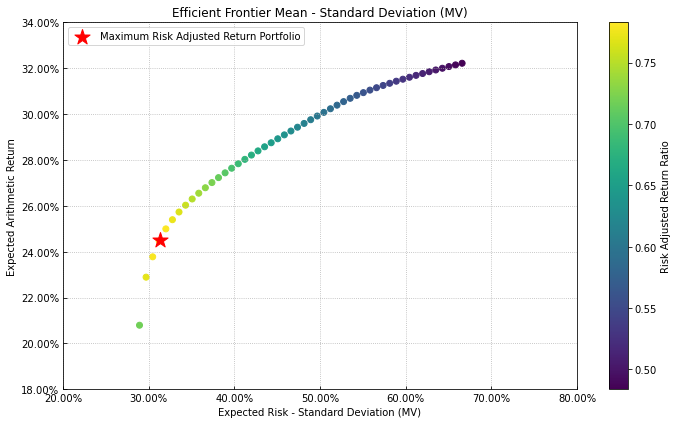

In [26]:
# plotting the efficient frontier

label = 'Maximum Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns


ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns,
                     rm=rm, rf=rf, alpha =0.05, cmap= 'viridis', w=w,
                     label=label, marker= '*', s=16, c='r', height=6,width=10,ax=None)

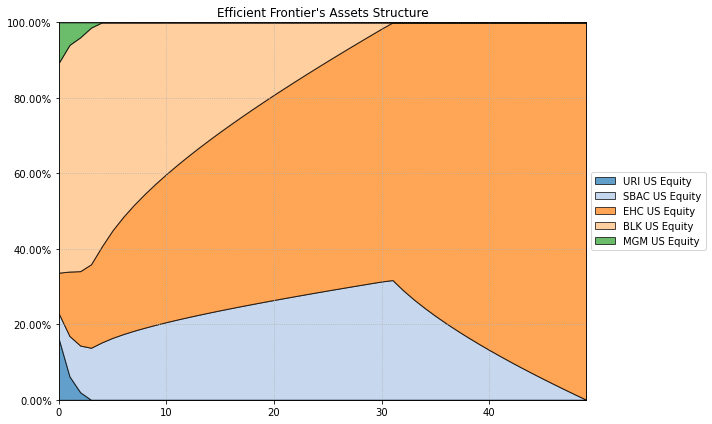

In [27]:
ax= rp.plot_frontier_area(w_frontier=frontier, cmap='tab20', height = 6,
                         width = 10, ax = None)

xaxis is the portfolio numbers 

yaxis- cumulative share of the stocks
